# Plot gene networks for overlapping recomputed Alasoo eQTLs

This code plots the network of genes associated with recomputed Alasoo eQTLs for which the same variant has been identified as Neanderthal-introgressed by Dannemann *et al.* and/or Simonti *et al.* Macrophages in the Alasoo dataset were divided into 4 treatment groups: IFNg, Salmonella, IFNg+Salmonella and Naive.

Neanderthal SNPs from:
1. Dannemann M, Prufer K & Kelso J. Functional implications of Neandertal introgression in modern humans. *Genome Biol* 2017 **18**:61.
2. Simonti CN *et al.* The phenotypic legacy of admixture between modern humans and Neandertals. *Science* 2016 **351**:737-41.

Recomputed Alasoo *et al.* (2018) eQTLs from:
* [EMBL-EBI eQTL Catalogue](https://www.ebi.ac.uk/eqtl/Data_access/)

---


First, the list of genes and associated p-values for each condition was obtained from: `/well/jknight/shiyao/data/alasoo/genes_*.txt`. This was inputted into the XGR R package  to obtain subnet edge information, using the following code.

```r
# Gene enrichment/network analysis
library(XGR)
library(RCircos)
RData.location <- "http://galahad.well.ox.ac.uk/bigdata_dev/"

# Get subnet
dd <- read.csv('genes_*.txt', sep = '\t',               # where * refers to IFN/IfnSal/Salmonella/naive
               header = FALSE, check.names = TRUE) 
design <- structure(dd$V2, names = as.character(dd$V1))
subnet <- xSubneterGenes(design, network="STRING_high", 
                         STRING.only=NA, seed.genes=T)  # seed.genes=F to include non-input genes

## Visualise subnet
# Colored according to input significance
xVisNet(g=subnet, pattern=-log10(as.numeric(V(subnet)$significance)), vertex.shape="sphere", colormap="wyr")
# Colored according to transformed scores
xVisNet(g=subnet, pattern=as.numeric(V(subnet)$score), vertex.shape="sphere")

## Save subnet results to the files called 'subnet_edges.txt' and 'subnet_nodes.txt'
edges <- igraph::get.data.frame(subnet, what="edges")
utils::write.table(edges, file="subnet_edges.txt", sep="\t", row.names=FALSE)
output <- igraph::get.data.frame(subnet, what="vertices")
utils::write.table(output, file="subnet_nodes.txt", sep="\t", row.names=FALSE)
```

---


Next, gene networks were plotted in Python using the subnet_edges.txt files.

In [1]:
# Import modules
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

### IFN (including non-input genes)

In [2]:
lines = open('subnet_edges_IFN_expand.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.4:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 3:
        print(node, G.degree(node))

UBA52 86.66666666666667
UBA52 6


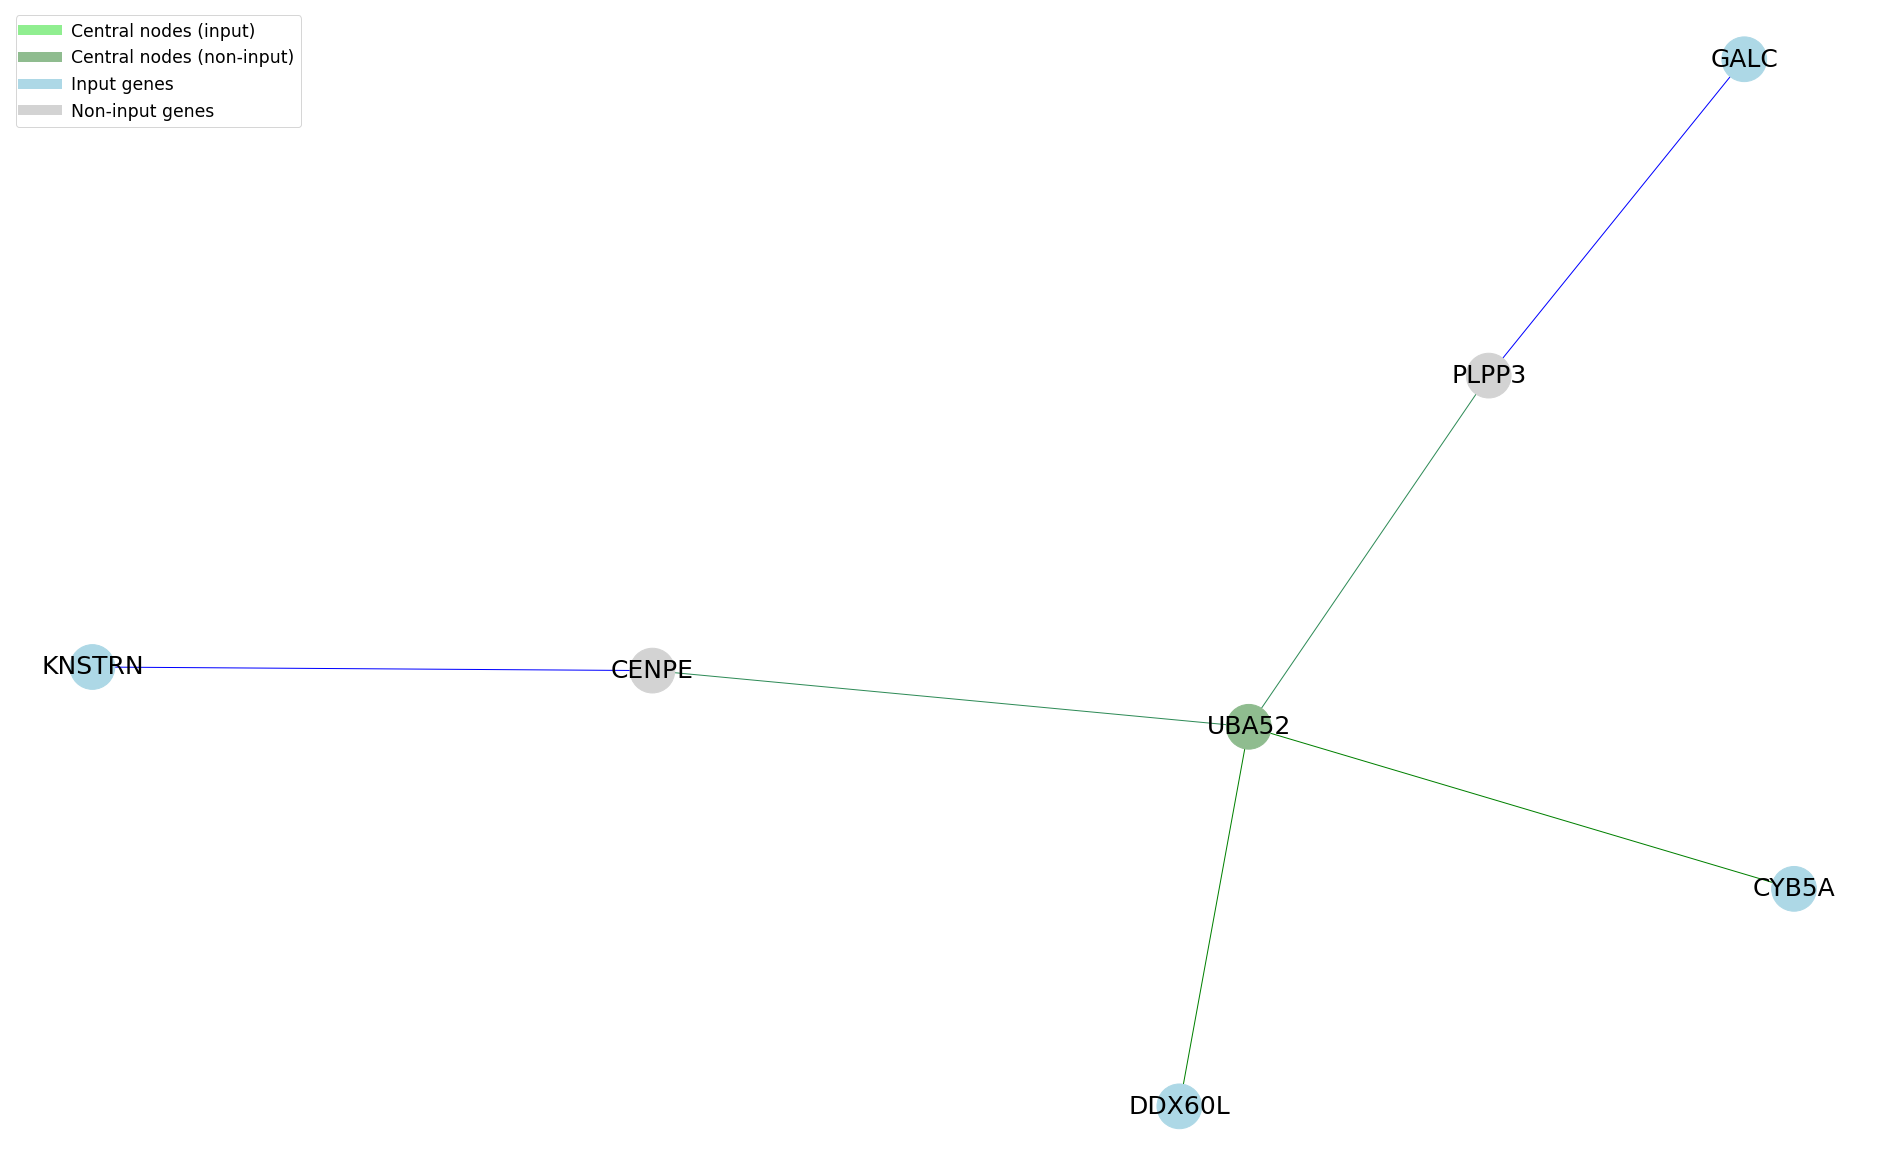

In [3]:
# Highlight central nodes
key_nodes = ['UBA52']
genes = open('genes_IFN.txt', 'r').read().splitlines()
lines = open('subnet_edges_IFN_expand.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    
    # Differentiate input and non-input genes
    if temp[0].strip('"') in genes or temp[1].strip('"') in genes:
        if temp[0].strip('"') in key_nodes or temp[1].strip('"') in key_nodes:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
        else:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
    else:
        if temp[0].strip('"') in key_nodes or temp[1].strip('"') in key_nodes:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='seagreen')
        else:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='gray')
            
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node.rstrip('"').lstrip('"') in genes:
        if node in key_nodes:
            color_map.append('lightgreen')
        else:
            color_map.append('lightblue')
    else:
        if node.rstrip('"').lstrip('"') in key_nodes:
            color_map.append('darkseagreen')
        else:
            color_map.append('lightgray')
legend_to_do.append(('Central nodes (input)', 'lightgreen'))
legend_to_do.append(('Central nodes (non-input)', 'darkseagreen'))
legend_to_do.append(('Input genes', 'lightblue'))
legend_to_do.append(('Non-input genes', 'lightgray'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)  

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()

---

### Salmonella (including non-input genes)

In [4]:
lines = open('subnet_edges_Salmonella_expand.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.4:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 6:
        print(node, G.degree(node))

UBA52 92.85714285714285
UBA52 8


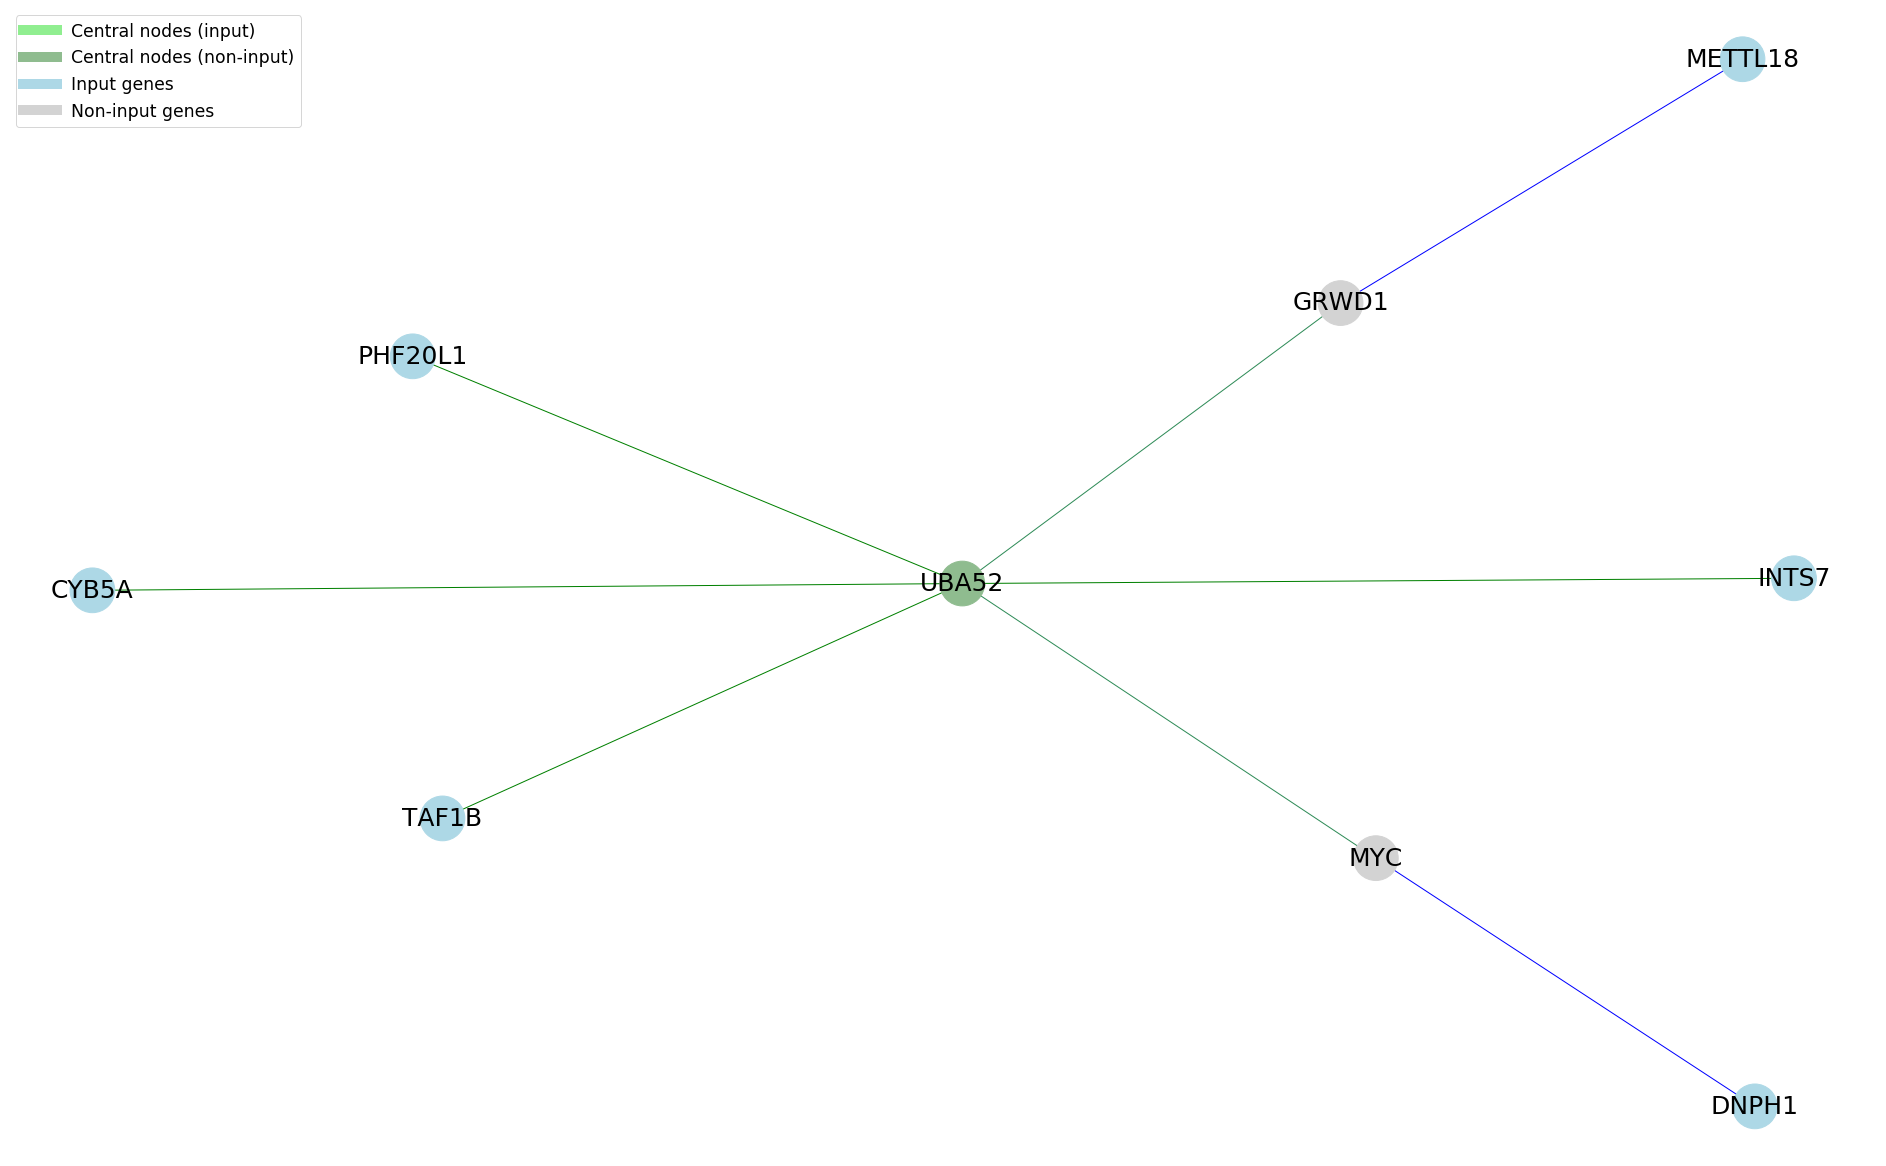

In [5]:
# Highlight central nodes
key_nodes = ['UBA52']
genes = open('genes_Salmonella.txt', 'r').read().splitlines()
lines = open('subnet_edges_Salmonella_expand.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    
    # Differentiate input and non-input genes
    if temp[0].strip('"') in genes or temp[1].strip('"') in genes:
        if temp[0].strip('"') in key_nodes or temp[1].strip('"') in key_nodes:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
        else:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
    else:
        if temp[0].strip('"') in key_nodes or temp[1].strip('"') in key_nodes:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='seagreen')
        else:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='gray')
            
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node.rstrip('"').lstrip('"') in genes:
        if node in key_nodes:
            color_map.append('lightgreen')
        else:
            color_map.append('lightblue')
    else:
        if node.rstrip('"').lstrip('"') in key_nodes:
            color_map.append('darkseagreen')
        else:
            color_map.append('lightgray')
legend_to_do.append(('Central nodes (input)', 'lightgreen'))
legend_to_do.append(('Central nodes (non-input)', 'darkseagreen'))
legend_to_do.append(('Input genes', 'lightblue'))
legend_to_do.append(('Non-input genes', 'lightgray'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)  

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()

---

### IFNg + Salmonella (including non-input genes)

In [6]:
lines = open('subnet_edges_IfnSal_expand.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.4:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 5:
        print(node, G.degree(node))

UBA52 86.66666666666667
UBA52 6


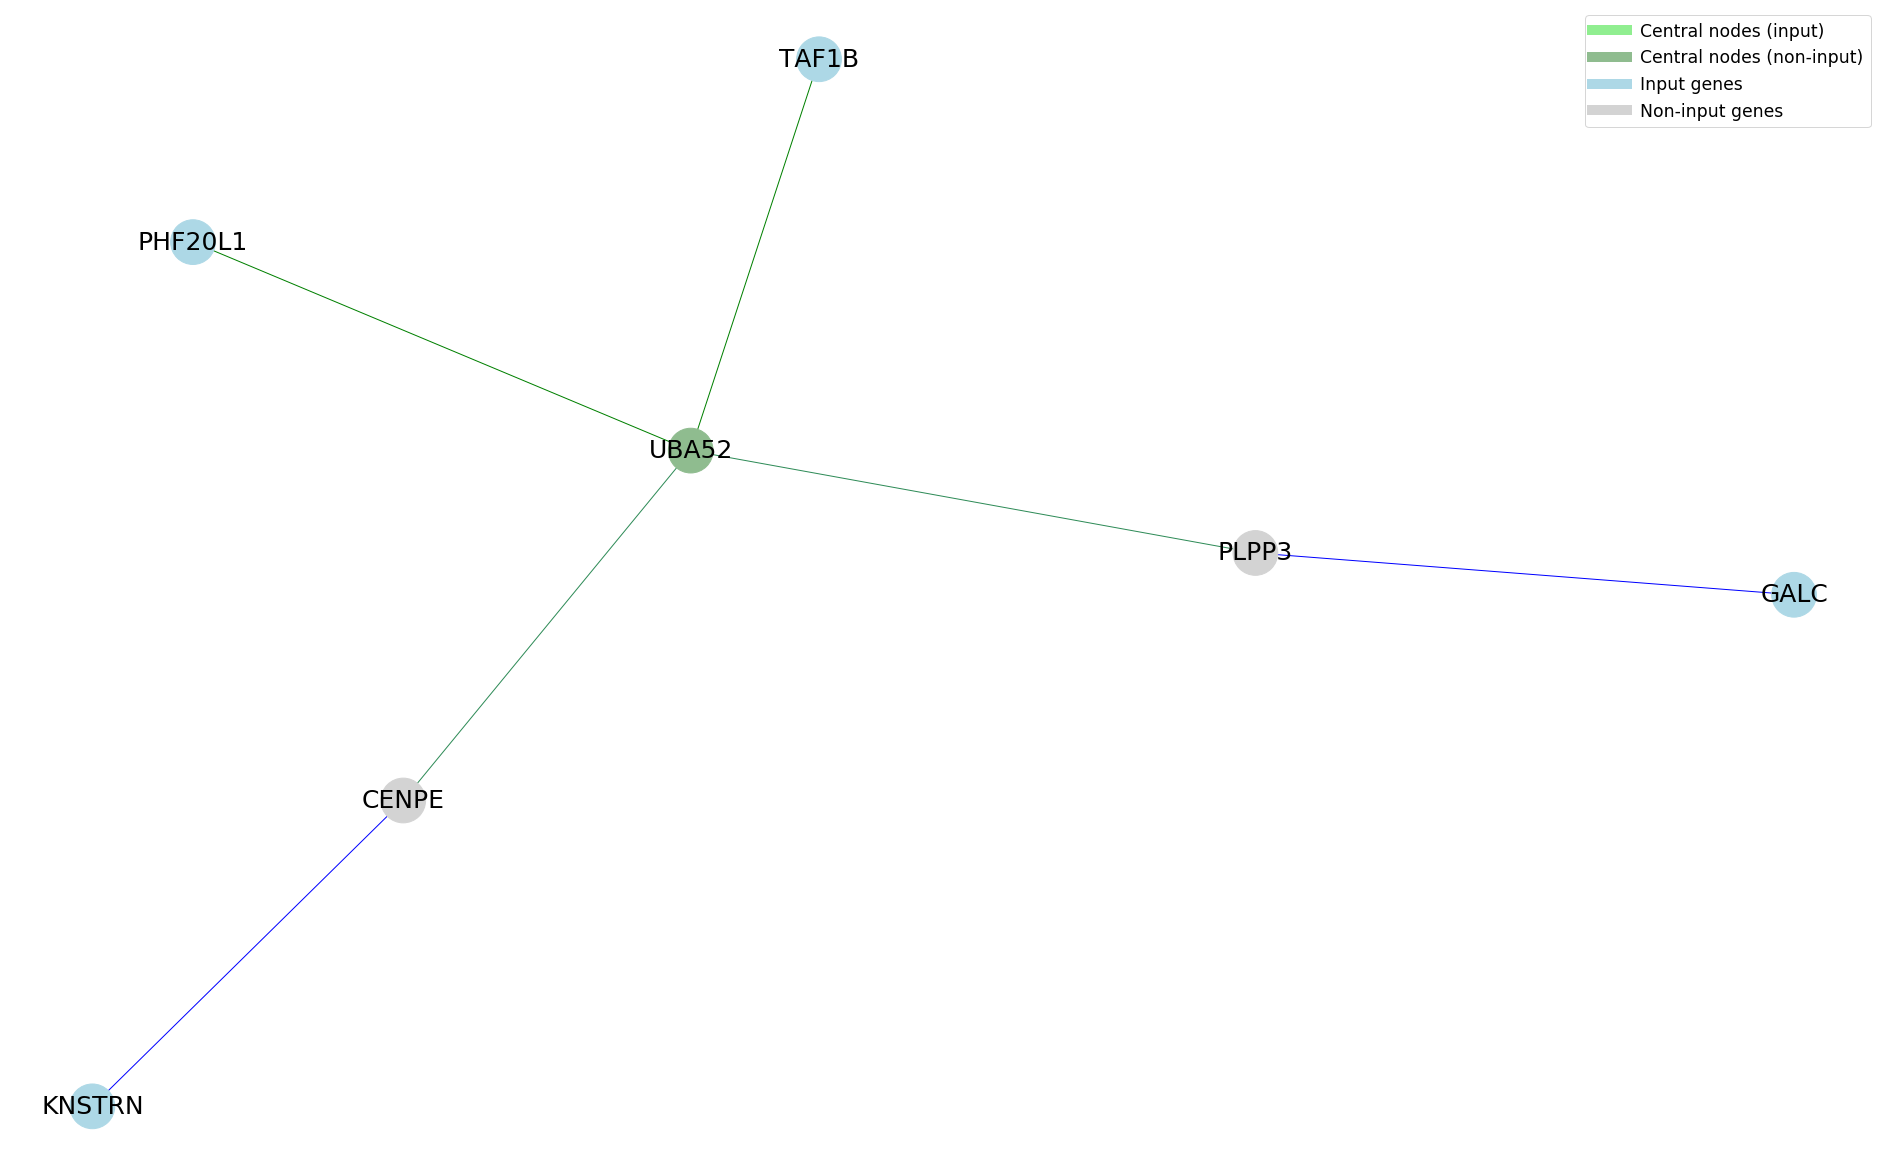

In [7]:
# Highlight central nodes
key_nodes = ['UBA52']
genes = open('genes_IfnSal.txt', 'r').read().splitlines()
lines = open('subnet_edges_IfnSal_expand.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    
    # Differentiate input and non-input genes
    if temp[0].strip('"') in genes or temp[1].strip('"') in genes:
        if temp[0].strip('"') in key_nodes or temp[1].strip('"') in key_nodes:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
        else:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
    else:
        if temp[0].strip('"') in key_nodes or temp[1].strip('"') in key_nodes:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='seagreen')
        else:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='gray')
            
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node.rstrip('"').lstrip('"') in genes:
        if node in key_nodes:
            color_map.append('lightgreen')
        else:
            color_map.append('lightblue')
    else:
        if node.rstrip('"').lstrip('"') in key_nodes:
            color_map.append('darkseagreen')
        else:
            color_map.append('lightgray')
legend_to_do.append(('Central nodes (input)', 'lightgreen'))
legend_to_do.append(('Central nodes (non-input)', 'darkseagreen'))
legend_to_do.append(('Input genes', 'lightblue'))
legend_to_do.append(('Non-input genes', 'lightgray'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)  

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()

---

### Naive (including non-input genes)

In [8]:
lines = open('subnet_edges_naive_expand.txt', 'r').read().splitlines()
G = nx.Graph()
for line in lines[1:]:
    temp = line.split('\t')
    G.add_edge(temp[0].strip('"'), temp[1].strip('"'))

# What are the central nodes:
central_nodes = nx.betweenness_centrality(G)
maxi = ''
maxo = 0
for item in central_nodes:
    if central_nodes[item] > 0.4:
        print(item, central_nodes[item] * 100)
    if central_nodes[item] > maxo:
        maxo = central_nodes[item]
        maxi = item

for node in G:
    if G.degree(node) > 5:
        print(node, G.degree(node))

UBA52 86.66666666666667
UBA52 6


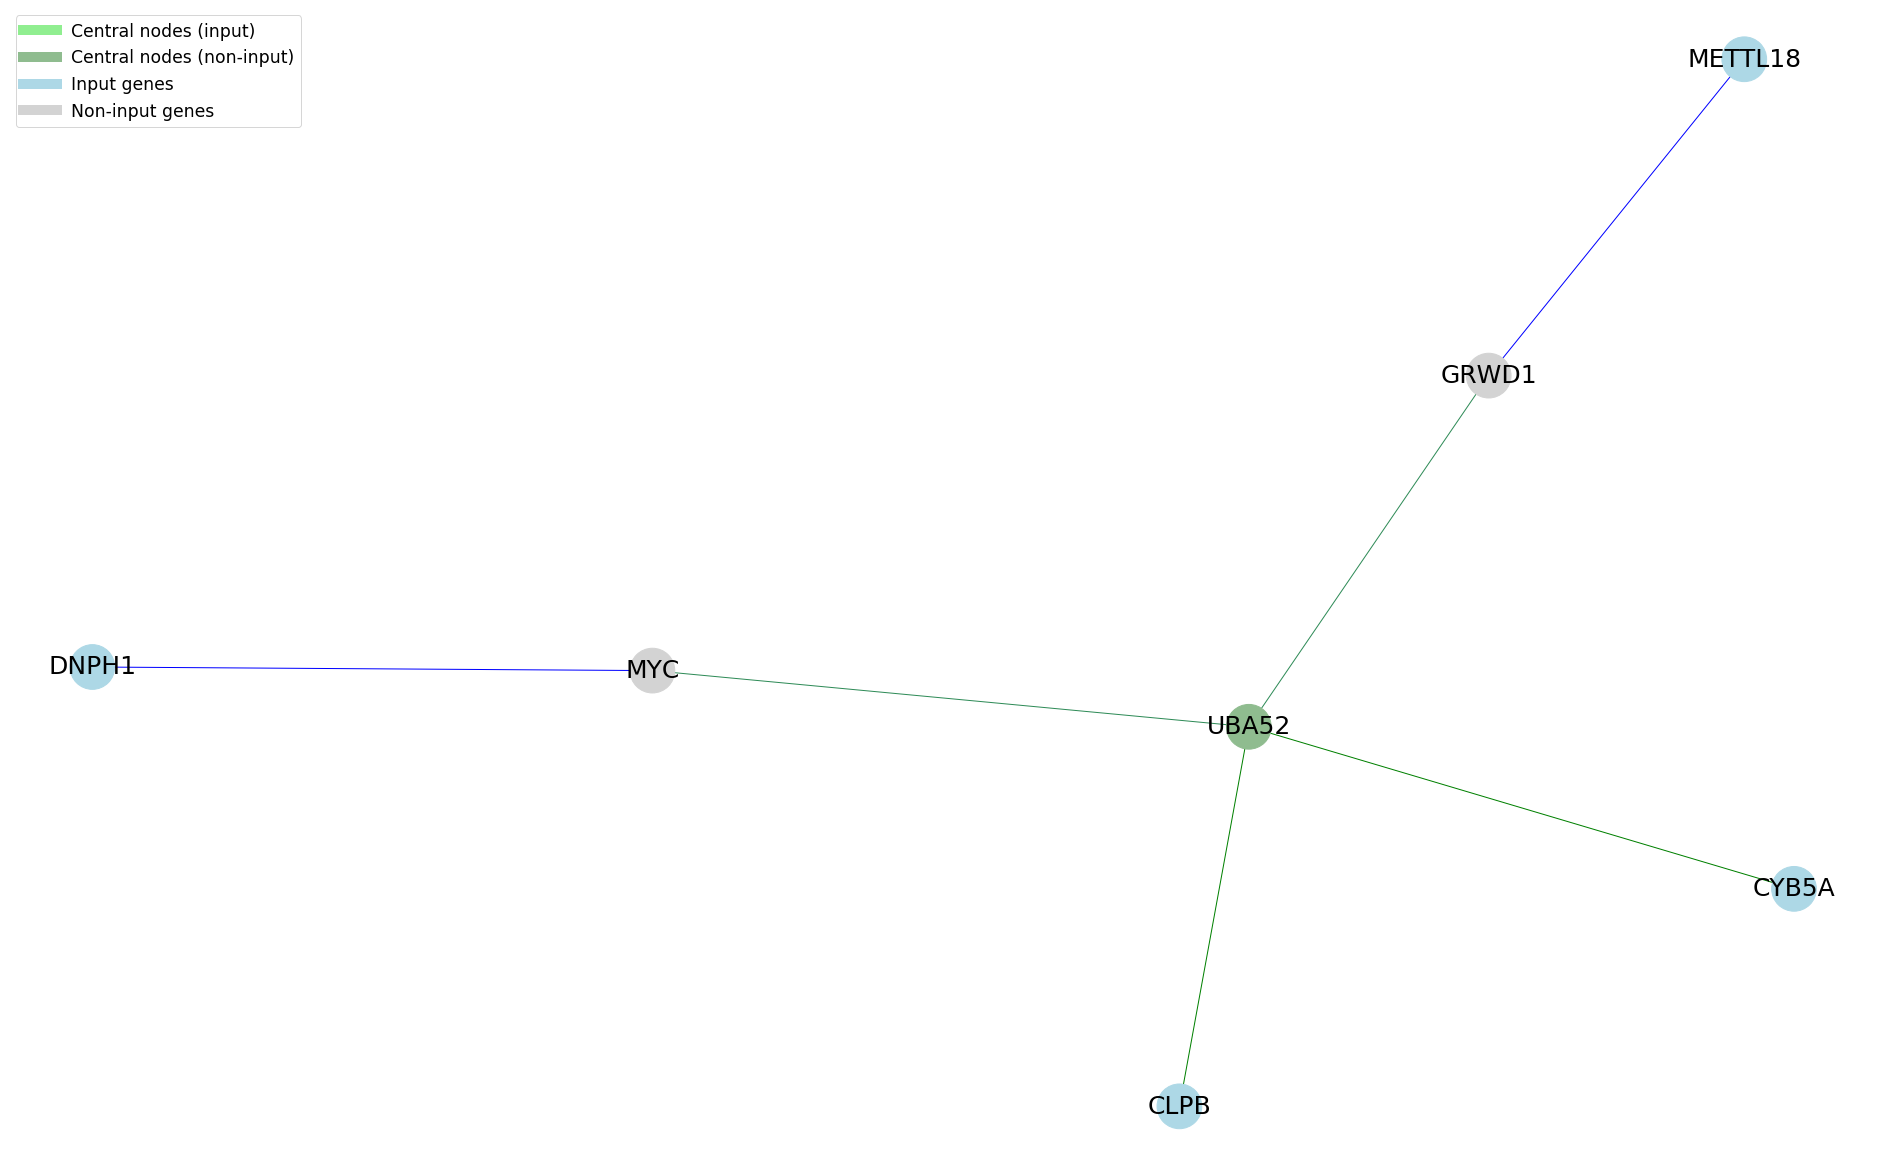

In [9]:
# Highlight central nodes
key_nodes = ['UBA52']
genes = open('genes_naive.txt', 'r').read().splitlines()
lines = open('subnet_edges_naive_expand.txt', 'r').read().splitlines()
for line in lines[1:]:
    temp = line.split('\t')
    
    # Differentiate input and non-input genes
    if temp[0].strip('"') in genes or temp[1].strip('"') in genes:
        if temp[0].strip('"') in key_nodes or temp[1].strip('"') in key_nodes:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='green')
        else:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='blue')
    else:
        if temp[0].strip('"') in key_nodes or temp[1].strip('"') in key_nodes:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='seagreen')
        else:
            G.add_edge(temp[0].strip('"'), temp[1].strip('"'), color='gray')
            
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

node_map = []
color_map = []
legend_to_do = []
for node in G:
    if node.rstrip('"').lstrip('"') in genes:
        if node in key_nodes:
            color_map.append('lightgreen')
        else:
            color_map.append('lightblue')
    else:
        if node.rstrip('"').lstrip('"') in key_nodes:
            color_map.append('darkseagreen')
        else:
            color_map.append('lightgray')
legend_to_do.append(('Central nodes (input)', 'lightgreen'))
legend_to_do.append(('Central nodes (non-input)', 'darkseagreen'))
legend_to_do.append(('Input genes', 'lightblue'))
legend_to_do.append(('Non-input genes', 'lightgray'))

fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(26)
nx.draw(G, pos=graphviz_layout(G), edges=edges, edge_color=colors, with_labels=True,
        node_color=color_map, font_size=25, node_size=2000)  

custom_lines = []
labels = []
for item in legend_to_do:
    custom_lines.append(Line2D([0], [0], color=item[1], lw=10))
    labels.append(item[0])

plt.legend(custom_lines, labels, loc=0, fontsize='xx-large')
plt.show()